### Bibliotecas y cargar la base de datos

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la base de datos desde un archivo CSV
data = pd.read_csv('student-por.csv')



### Análisis estadístico descriptivos

Este conjunto de datos aborda el rendimiento estudiantil en la educación secundaria de **dos** escuelas portuguesas. 

Los atributos de los datos incluyen las calificaciones de los **estudiantes, características demográficas, sociales y relacionadas con la escuela, y se recopilaron utilizando informes escolares y cuestionarios**. 

Se proporcionan dos conjuntos de datos con respecto al rendimiento en dos materias distintas: **Matemáticas (mat) y Lengua Portuguesa (por)**. En [Cortez y Silva, 2008], los dos conjuntos de datos se modelaron bajo tareas de **clasificación binaria/de cinco niveles y tareas de regresión**. 

Nota importante: el atributo objetivo G3 tiene una fuerte correlación con los atributos G2 y G1. Esto ocurre porque G3 es la calificación del último año (emitida en el tercer período), mientras que G1 y G2 corresponden a las calificaciones del primer y segundo período. Es más difícil predecir G3 sin G2 y G1, pero dicha predicción es mucho más útil (consulte la fuente del artículo para obtener más detalles).

DataSet : https://www.kaggle.com/datasets/larsen0966/student-performance-data-set?resource=download





In [32]:
df = data.copy(deep=True)

#printing shape of the data and data info
print('Data Shape:',df.shape)
#print(df.info())
display(df.head())

Data Shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13



Numeric Data Statistics


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000



Pearson's Correlation


<Axes: >

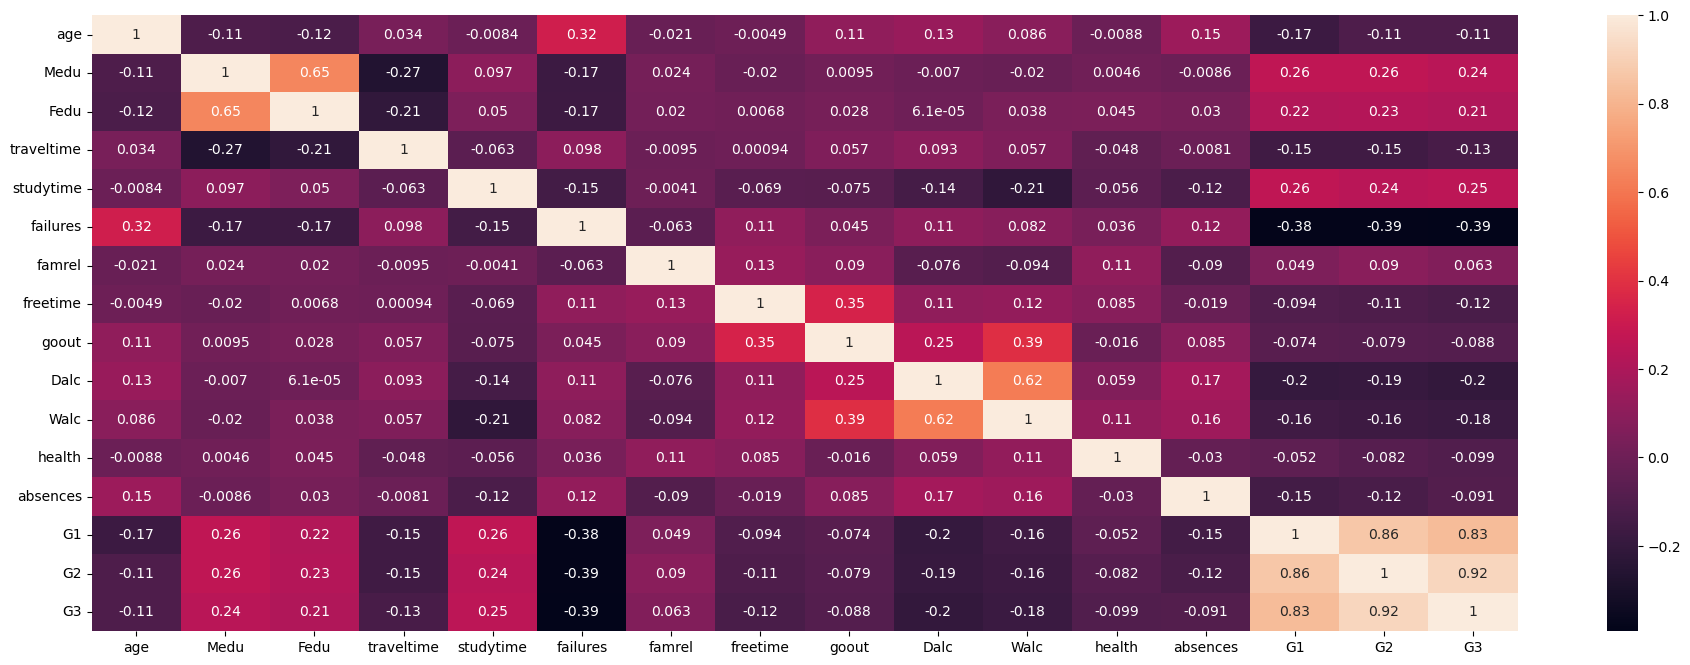

In [39]:
#Numeric data statistics
print('\nNumeric Data Statistics\033[1;0m')
display(df.select_dtypes(include=np.number).describe())
print('\nPearson\'s Correlation')
plt.figure(figsize=(23,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

El grafico decorrelacion se interpretan de la siguiente manera:

- 1  : correlación positiva total
- 0  : no hay correlación
- -1 : correlación negativa total

Donde la correlación positiva total significa que si aumenta el valor de una variable, también aumenta el valor de la otra variable. En el caso de la correlación negativa total, si aumenta el valor de una variable, disminuye el valor de la otra variable.

Que significa que tenga correlacion ?

 - Si dos variables están correlacionadas, se pueden usar para predecir una variable a partir de la otra, lo que es fundamental en la construcción de modelos predictivos.
 - En el aprendizaje automático, la correlación se utiliza para seleccionar las características más relevantes o eliminar las redundantes para mejorar la eficiencia del modelo.
 - Puede ayudar a validar hipótesis sobre las relaciones entre variables en estudios científicos y análisis de datos.

Es importante recordar que la correlación no implica causalidad. Solo porque dos variables estén correlacionadas, no significa necesariamente que una causa la otra. Puede haber factores subyacentes o desconocidos que influyan en ambas variables. Por lo tanto, al interpretar la correlación, es importante tener en cuenta el contexto y considerar otras evidencias antes de hacer afirmaciones sobre causalidad.


Con estos coeficientes de correlación podemos ver que las variables que más influyen en la nota final son G1, G2 y G3, que son las notas de los tres trimestres. 

También podemos ver que existe una correlación entre las variables de las notas de los trimestres, lo que es lógico, ya que si un alumno tiene buenas notas en el primer trimestre, es probable que también las tenga en el segundo y en el tercero.

In [57]:
# Primero, para facilitar un poco las cosas, dividiré las columnas en 
# 3 listas para datos Categóricos, Numéricos y Datos Continuos.

cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
num_columns = ['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health']
cont_columns = ['age','failures','absences','G1','G2','G3']

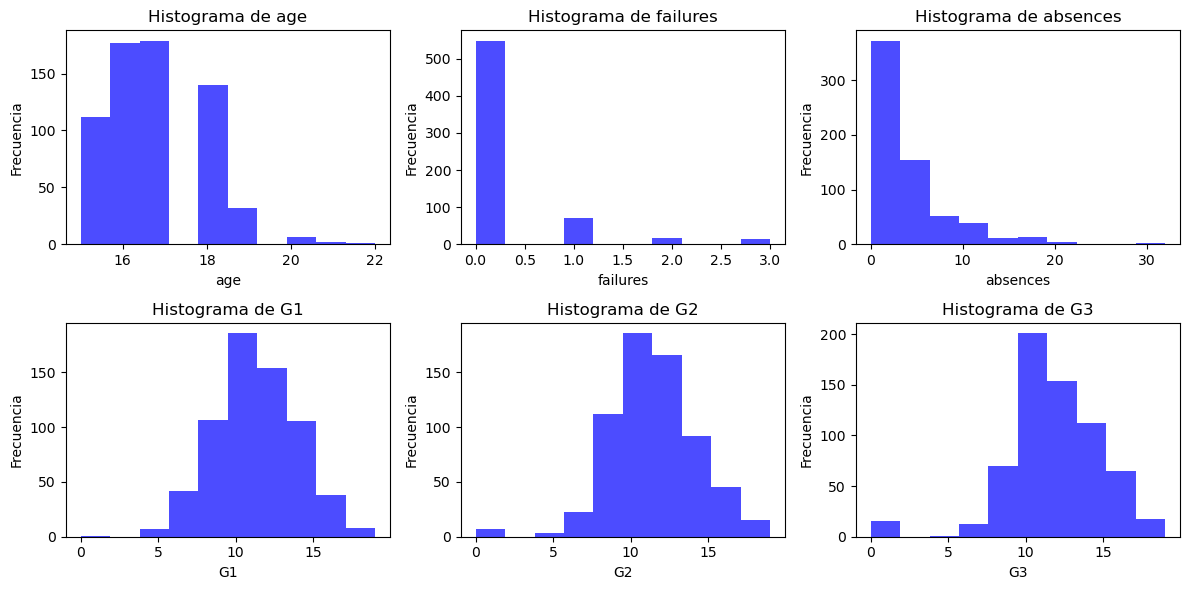

In [58]:
# Crear histogramas con estilo
plt.figure(figsize=(12, 6))

for i in range(0, len(cont_columns)):
    plt.subplot(2, 3, i+1)
    plt.hist(df[cont_columns[i]], bins=10, color='blue', alpha=0.7)
    plt.xlabel(cont_columns[i])
    plt.ylabel('Frecuencia')
    plt.title('Histograma de ' + cont_columns[i])

plt.tight_layout()
plt.show()

In [63]:
media_numerica = df[cont_columns].mean()

# Imprime el resultado
print(media_numerica)

age         16.744222
failures    0.221880 
absences    3.659476 
G1          11.399076
G2          11.570108
G3          11.906009
dtype: float64


     Media Ponderada
0    6.3            
1    6.5            
2    8.3            
3    7.1            
4    6.6            
..   ...            
644  7.5            
645  9.1            
646  8.0            
647  7.5            
648  7.3            

[649 rows x 1 columns]


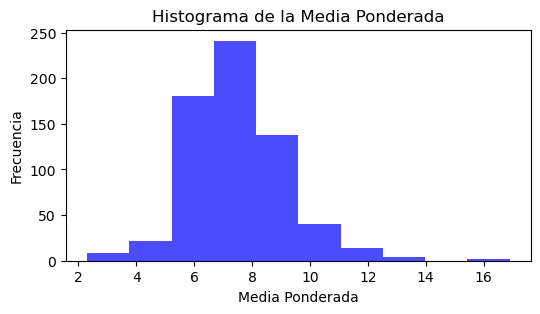

In [61]:
# 2. Calcula la Media Ponderada de las columnas con datos continuos

# Define los pesos para cada columna numérica (puedes ajustar estos pesos según tus necesidades)
pesos = {'age': 0.1, 'failures': 0.2, 'absences': 0.3, 'G1': 0.1, 'G2': 0.2, 'G3': 0.1}

# Calcula la Media Ponderada
media_ponderada = (df[cont_columns] * pd.Series(pesos)).sum(axis=1)

# Añade la Media Ponderada al DataFrame
df['Media Ponderada'] = media_ponderada

# Imprime el resultado
print(df[['Media Ponderada']])

# Plot 
plt.figure(figsize=(6, 3))
plt.hist(df['Media Ponderada'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Media Ponderada')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Media Ponderada')
plt.show()

